In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from cosmos_helper_funcs import get_stacks, label_plot, cosmos_gain_dict, get_mean_images

In [2]:
mode = 'HSHGRS'
bias_folder = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Read Noise/' + mode
bias_stack = get_stacks(bias_folder, get_mean_img=True, get_var_img=True, num_imgs=1)[0]

Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Read Noise/HSHGRS/calibrated_HSHG_RS_dark_1us_-25C 2024-09-30 06_42_46.fits


In [3]:
bias_folder_raw = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Read Noise/' + mode + '/Raw'
bias_stack_raw = get_stacks(bias_folder_raw, get_mean_img=True, get_var_img=True, num_imgs=1)[0]

Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Read Noise/HSHGRS/Raw/HSHG_RS_dark_1us_-25C 2024-09-30 06_42_46.fits


In [5]:
defect_map_file = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Outlier Maps/HSHG_RS_combined_Outlier_binary_maskdark.fits'
defect_map = fits.getdata(defect_map_file)
defect_map = np.where(defect_map == 0, np.nan, 1)
mean_bias_frame = bias_stack['mean_img'] * defect_map
var_bias_frame = bias_stack['var_img'] * defect_map
mean_raw_bias_frame = bias_stack_raw['mean_img'] * defect_map
var_raw_bias_frame = bias_stack_raw['var_img'] * defect_map
mean_bias_frame = np.where(var_bias_frame > 1e6, np.nan, mean_bias_frame)
var_bias_frame = np.where(var_bias_frame > 1e6, np.nan, var_bias_frame)
mean_raw_bias_frame = np.where(var_raw_bias_frame > 1e6, np.nan, mean_raw_bias_frame)
var_raw_bias_frame = np.where(var_raw_bias_frame > 1e6, np.nan, var_raw_bias_frame)

In [6]:
print(np.nanmean(mean_bias_frame))
print(np.nanmean(var_bias_frame))
print(np.nanmean(mean_raw_bias_frame))
print(np.nanmean(var_raw_bias_frame))

99.15094071960425
44.22611518380556
218.9944836216736
2.672870866836641


In [ ]:
mean_raw_bias_frame = np.nan_to_num(mean_raw_bias_frame, nan=np.nanmean(mean_raw_bias_frame))
mean_bias_frame = np.nan_to_num(mean_bias_frame, nan=np.nanmean(mean_bias_frame))

In [17]:
%matplotlib qt
# Set nans to mean value
# 2 frames, horizontally. Imshow mean raw frame and mean calibrated frame
fig, ax = plt.subplots(1, 2)
im = ax[0].imshow(mean_raw_bias_frame, vmin=200, vmax=300, cmap='gray')
# Make sure colorbar is right size
fig.colorbar(im, ax=ax[0], fraction=0.046)
im = ax[1].imshow(mean_bias_frame, vmin=50, vmax=150, cmap='gray')
# label_plot(ax[1], 'Mean Calibrated Bias Frame', 'X [pixels]', 'Y [pixels]')
fig.colorbar(im, ax=ax[1], fraction=0.046)
plt.show()


: 

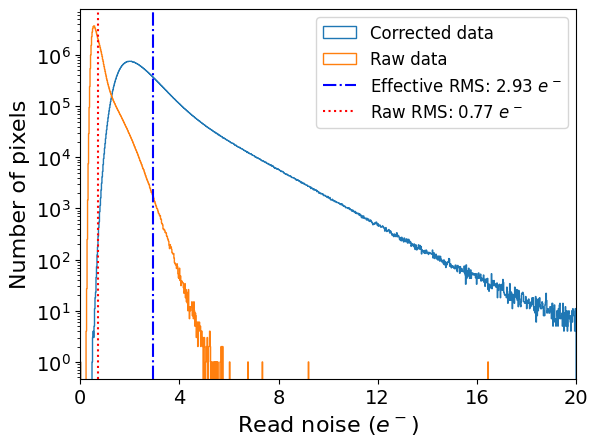

In [49]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
gain = 4.30 # ADU/e-
read_noise_array = np.sqrt(var_bias_frame) / gain
read_noise_array_raw = np.sqrt(var_raw_bias_frame) / gain
# Get rid of values above 1000
read_noise_array = np.where(read_noise_array > 1000, np.nan, read_noise_array)
read_noise_array_raw = np.where(read_noise_array_raw > 1000, np.nan, read_noise_array_raw)
read_noise_median = np.nanmedian(read_noise_array)
read_noise_mean = np.nanmean(read_noise_array)
read_noise_rms = np.sqrt(np.nanmean(read_noise_array ** 2))
read_noise_median_raw = np.nanmedian(read_noise_array_raw)
read_noise_mean_raw = np.nanmean(read_noise_array_raw)
read_noise_rms_raw = np.sqrt(np.nanmean(read_noise_array_raw ** 2))
hist, bin_centers, bin_edges = plt.hist(read_noise_array.flatten(), bins=1000, range=(0, 20), histtype='step', label='Corrected data')
hist_raw, bin_centers_raw, bin_edges_raw = plt.hist(read_noise_array_raw.flatten(), bins=1000, range=(0, 20), histtype='step', label='Raw data')
plt.xlabel(r'Read noise ($e^-$)', fontsize=16)
plt.ylabel('Number of pixels', fontsize=16)
# plt.xscale('log')
plt.yscale('log')
read_noise_mode = bin_centers[np.argmax(hist)]
# plt.axvline(read_noise_median, color='k', linestyle='--', label=f'Effective Median: {read_noise_median:.2f} ' + r'$e^-$')
# plt.axvline(read_noise_mean, color='blue', linestyle='-', label=f'Effective Mean: {read_noise_mean:.2f} ' + r'$e^-$')
plt.axvline(read_noise_rms, color='blue', linestyle='-.', label=f'Effective RMS: {read_noise_rms:.2f} ' + r'$e^-$')
plt.axvline(read_noise_mean_raw, color='red', linestyle=':', label=f'Raw RMS: {read_noise_rms_raw:.2f} ' + r'$e^-$')
plt.legend(fontsize=12, ncol=1)
plt.xlim(0.1, 20)
# plt.ylim(1, 5e6)
# Make the xtick labels integers
plt.xticks(np.arange(0, 21, 4))
# plt.title(mode)
plt.show()

In [5]:
import tifffile
# Load MPTIFF file
tiff_path = '/Volumes/LAYDENUSB/qCMOS Images/bias_frames_ultra_quiet_4_7_25.tif'
frames = tifffile.imread(tiff_path)  # shape: (n_frames, height, width)

# Check shape
print(f"Loaded MPTIFF shape: {frames.shape}")

# Save as FITS
fits_path = '/Volumes/LAYDENUSB/qCMOS Images/bias_frames_ultra_quiet_4_7_25.fits'
hdu = fits.PrimaryHDU(data=frames)
hdu.writeto(fits_path, overwrite=True)

print(f"Saved FITS to: {fits_path}")

Loaded MPTIFF shape: (200, 2304, 4096)
Saved FITS to: /Volumes/LAYDENUSB/qCMOS Images/bias_frames_ultra_quiet_4_7_25.fits


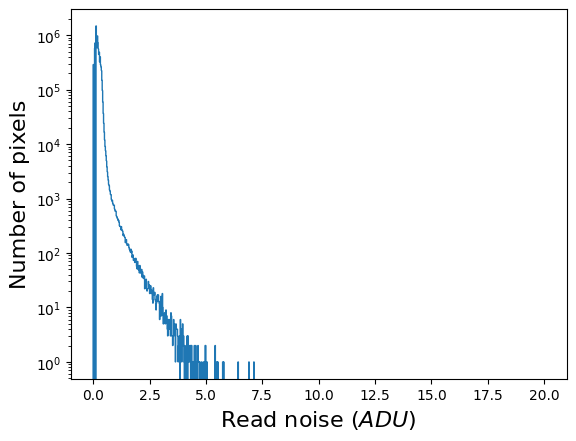

In [ ]:
# Load fits file for ultra quiet mode
frames = fits.getdata('/Volumes/LAYDENUSB/qCMOS Images/bias_frames_phot_res_4_7_25.fits')
# Take variance across frames
var_bias_frame = np.var(frames, axis=0)
# Take square root
std_bias_frame = np.sqrt(var_bias_frame)

Median read noise:  0.18377975949489084
Mean read noise:  0.2034956453202681
RMS read noise:  0.23273927440781306


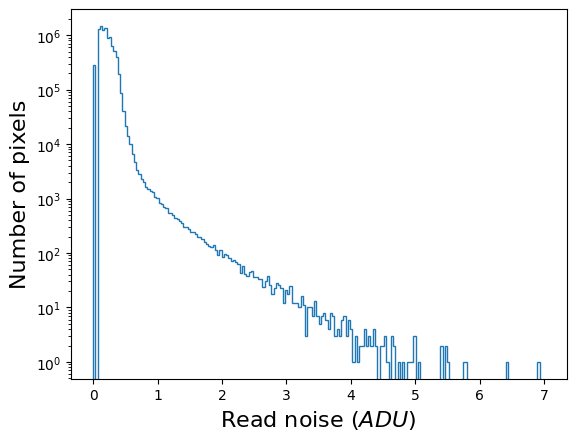

In [17]:
# Plot histogram
plt.hist(std_bias_frame.flatten(), bins=200, range=(0, 7), histtype='step', label='Corrected data')
plt.xlabel(r'Read noise ($ADU$)', fontsize=16)
plt.ylabel('Number of pixels', fontsize=16)
print('Median read noise: ', np.median(std_bias_frame))
print('Mean read noise: ', np.mean(std_bias_frame))
print('RMS read noise: ', np.sqrt(np.mean(std_bias_frame ** 2)))
# plt.xscale('log')
plt.yscale('log')
plt.show()